<a href="https://colab.research.google.com/github/grsart/BiomolComp/blob/main/Pratica6/AnaliseFilogenetica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/grsart/BiomolComp/blob/main/Pratica6/AnaliseFilogenetica3.ipynb)

# Introdução #

Obviamente, também podemos usar ferramentas do [Biopython](http://biopython.org) para análises filogenéticas.

O Biopython ainda não é muito completo para esta finalidade. Mas algumas análises preliminares podem ser realizadas rapidamente com as ferramentas do Biopython.

In [1]:
#@title Preparando o Ambiente para a Execução

# Installing Biopython and importing required libraries...

!pip3 install biopython
from Bio import SeqIO
from Bio.Align.Applications import ClustalwCommandline
from Bio import Phylo
import os

# Gettting ClustalW2....

!wget http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!tar -xzf clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
!mv clustalw-2.1-linux-x86_64-libcppstatic/clustalw2 .


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


--2025-10-03 03:34:06--  http://www.clustal.org/download/current/clustalw-2.1-linux-x86_64-libcppstatic.tar.gz
Resolving www.clustal.org (www.clustal.org)... 137.43.93.206
Connecting to www.clustal.org (www.clustal.org)|137.43.93.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2468744 (2.4M) [application/x-gzip]
Saving to: ‘clustalw-2.1-linux-x86_64-libcppstatic.tar.gz’

clustalw-2.1-linux- 100%[===================>]   2.35M  2.01MB/s    in 1.2s    

2025-10-03 03:34:08 (2.01 MB/s) - ‘clustalw-2.1-linux-x86_64-libcppstatic.tar.gz’ saved [2468744/2468744]



# Análise Filogenética #

Nesta seção, vamos fazer o download da sequência de domínios transcriptase reversa de retrotransposons do tipo non-LTR que já usamos anteriormente.

Na sequência inspecionaremos as sequências presentes neste arquivo.

In [2]:
seq_file="filogenia1.fasta"

!wget https://raw.githubusercontent.com/grsart/BiomolComp/main/Pratica6/filogenia1.fasta

count=0
for seq_record in SeqIO.parse(seq_file, "fasta"):
    count = count+1
    print("SeqID: %s" % seq_record.id)
    print(repr(seq_record.seq))
    print("Sequence Length: %d" % len(seq_record))
print("")
print("Number of sequences found: %d" % count);


--2025-10-03 03:34:51--  https://raw.githubusercontent.com/grsart/BiomolComp/main/Pratica6/filogenia1.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8508 (8.3K) [text/plain]
Saving to: ‘filogenia1.fasta’

filogenia1.fasta    100%[===================>]   8.31K  --.-KB/s    in 0s      

2025-10-03 03:34:51 (54.3 MB/s) - ‘filogenia1.fasta’ saved [8508/8508]

SeqID: L1Mouse
Seq('SFYEATITLIPKPQKDPTKIENFRPISLMNIDAKILNKILANRIQEHIKAIIHP...VTL')
Sequence Length: 266
SeqID: L1rat
Seq('SFYEATITLIPKPHKDTTKKENFRPISLMNINAKILNKILANRIQEHIKTIIHH...VTL')
Sequence Length: 266
SeqID: L1Homo
Seq('SFYEASIILIPKPGRDTTKKENFRPISLMNIDAKILNKILANRIQQHIKKLIHH...IQL')
Sequence Length: 266
SeqID: swimmer
Seq('SWNEAIISIIPKEGKDRLDCANYRPVSVLNIDYKLFTSIISRRLETILPMLMHK...IAL')
Sequence Le

## Alinhamento das Sequências ##

Nesta etapa, usamos o programa [ClustalW](http://www.clustal.org/clustal2/) para preparar um alinhamento múltiplo de sequências (MSA). Como o ClustalW utiliza o método progressivo para o alinhamento múltiplo, as distâncias entre as sequências já são calculadas e salvas juntamente com o alinhamento. Efetivamente, o programa gera um arquivo:

```
to store a dendrogram that describes the similarity
of the sequences to each other.
```

Este arquivo **não é uma árvore filogenética**. Ele é a árvore guia (*guide-tree*) para a construção do alinhamento múltiplo. Mas, como o texto acima nos diz, ele agrupa as sequências similares, com as distâncias entre elas. Isto pode dar uma ideia do quão próximas as sequências são dentro de um alinhamento múltiplo.

Na etapa abaixo, vamos fazer o alinhamento múltiplo (MSA) com o clustalw.


In [3]:
clustalw_exe = r"./clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=seq_file, gapopen=5, gapext=0.1)
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

from Bio import AlignIO
align = AlignIO.read("filogenia1.aln", "clustal")
for record in align:
  print("%s - %s" % (record.seq, record.id))


-SFYEATITLIPKPQKDPTKI---ENFRPISLMNIDAKILNKILANRIQEHIKA--IIHPDQVGFIP-GMQGWFNIRK---SINVIHYINKLKDKNHMIISLDAEKAFDKIQHPFMIKVLERSGIQGQYLNMIKAIYSKPVANIK----VNGEKLETIPLKSGTRQGCPLSPYLFNIVLEVLARAIQQ---------QKEIKGIQIGKEEVKISLFADDMIVYISDPK------NSNRELLNLINSFGEVAGYKINSNKSMAFL--------YTKNKQAEKEIRETTPFSIA--TNNIKYLGVTL- - L1Mouse
-SFYEATITLIPKPHKDTTKK---ENFRPISLMNINAKILNKILANRIQEHIKT--IIHHDQVGFIP-GMQGWFNIRK---TINVIHYINKLKEQNHMIISLDAEKAFDKIQHPFMIKVLERIGIQGPYLNIVKAIYSKPVANIK----LNGEKLEAIPLKSGTRQGCPLSPYLFNIVLEVLARPIRK---------QKEIKGIQIGKEEVKISLFADDMIVYLSDPK------SSTREQLKLINNFSKVAGYKINSNKSVAFL--------YTKEKQAEKEIRETTPFIID--PNNIKYLGVTL- - L1rat
-SFYEASIILIPKPGRDTTKK---ENFRPISLMNIDAKILNKILANRIQQHIKK--LIHHDQVGFIP-GMQGWFNIRK---SINVIQHINRAKDKNHMIISIDAEKAFDKIQQPFMLKTLNKLGIDGTYFKIIRAIYDKPTANII----LNGQKLEAFPLKTGTRQGCPLSPLLFNIVLEVLARAIRQ---------EKEIKGIQLGKEEVKLSLFADDMIVYLENPI------VSAQNLLKLISNFSKVSGYKINVQKSQAFL--------YTNNRQTESQIMSELPFTIA--SKRIKYLGIQL- - L1Homo
-SWNEAIISIIPKEGKDRLDC---ANYRPVSVLNIDYKLFTSIISRRLETIL

## Análise da Árvore Guia ##

O programa ClustalW deve ter gerado dois arquivos. O arquivo filogenia1.aln foi o arquivo que visualizamos na célula acima. Este arquivo contém o alinhamento gerado pelo método progressivo.

Já o arquivo filogenia1.dnd contem o dendograma com as distâncias (ou similaridades) que as sequências têm entre si. Este arquivo pode ser usado diretamente para a visualização de uma árvore de distâncias.

In [4]:
tree = Phylo.read("filogenia1.dnd", "newick")
Phylo.draw_ascii(tree)

                                                   ______ L1Mouse
                                         _________|
                    ____________________|         |______ L1rat
                   |                    |
         __________|                    |_______________ L1Homo
        |          |
        |          |______________________________________ swimmer
        |
        |               __________________________________ R2dros
       ,|         _____|
       ||    ____|     |___________________________________ R2earwig
       ||   |    |
       || __|    |________________________________________ R2bombyx
       |||  |
    ___|||  |_________________________________________________ R4
   |   | |
   |   | |      ________________________________________ Rte1
   |   | |_____|
   |   |       |_________________________________________ RTE2
   |   |
   |   |__________________________________________________________ CRE2
  _|
 | |  _________________________________________ 

## Análise da Árvore ##

No método acima, representamos uma árvore usando um formato de desenho em texto (ASCII). Esta metodologia é simples e rápida e os braços da árvore têm distâncias proporcionais à similaridade entre as sequências.

É possível também gerar uma imagem com a árvore, desde que a biblioteca matplotlib esteja instalada e disponível (ela usualmente está disponível no Google Colab).

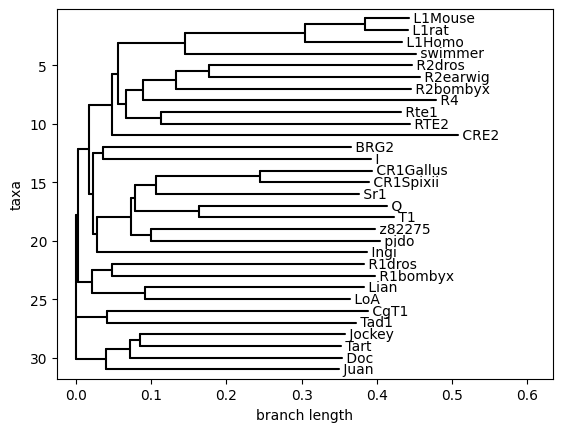

In [5]:
tree.rooted = True
Phylo.draw(tree)

Compare a árvore obtida nesta análise com a árvore obtida na análise filogenética realizada com o MEGA11.

**Q13- Elas são similares? Explique considerando as diferenças entre uma árvore-guia e uma árvore filogenética**

**Q14- Por que não é seguro fazer inferências filogenéticas a partir de uma árvore-guia?**